In [ ]:
## vectordatabase as Astra

In [ ]:
## Langchain

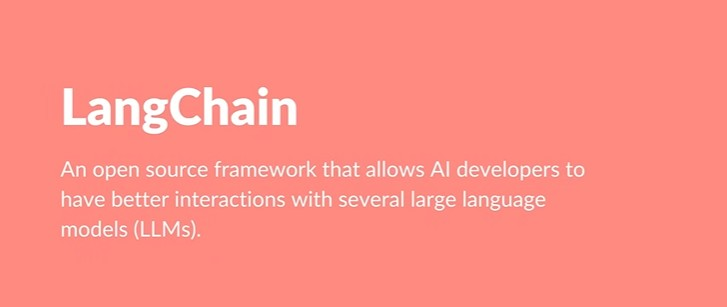

In [ ]:
from PIL import Image
Image.open(r'/content/langchain.jpg')

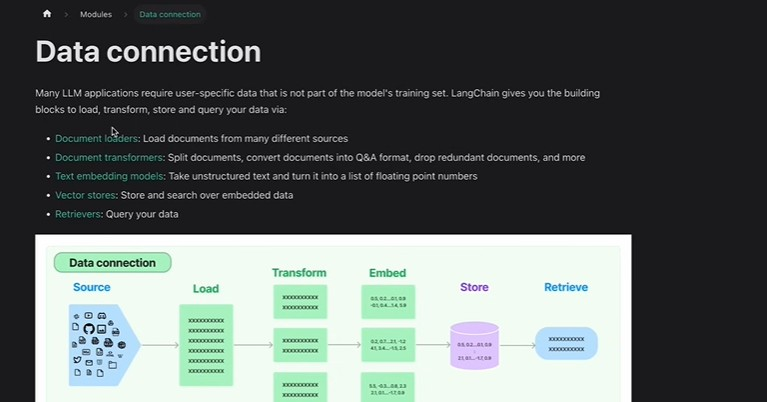

In [ ]:
from PIL import Image
Image.open(r'/content/data_connection.jpg')

In [ ]:
ASTRA_DB_SECURE=""
ASTRA_DB_APPLICATION_TOKEN
ASTRA_DB_CLIENT_ID="token"
ASTA_DB_CLIENT_SECRET=""
ASTRA_DB_KEYSPACE=""
OPENAI_API_KEY=""

In [ ]:
from langchain.vectorstores.cassandra import Cassandra
from langchain.index.vectorstores import VectorStoreIndexWrapper
from langchain.llms import OpenAI
from cassandra.cluster import cluster
from dataset import load_datasets
from cassandra.auth import PlainTextAuthProvider
from langchain.embeddings import OpenAIEmbeddings
cloud_config={'secure_connect_bundle':r'/content/secure-connect-vectordatabase.zip'}
cluster=Cluster(cloud=cloud_config,auth_provider=auth_provider)
astrasession=cluster.connect(cloud=cloud_config,auth_provider=auth_provider)

In [ ]:
mycassandravstore=Cassandra(embedding=myembedding,session=astrasession,keyspace=ASTRA_DB_KEYSPACE,table_name="qa_mini_demo")
myDataset=load_dataset("Bidddls/Onion_news",split="train")
headlines=myDataset["train"]["headline"]
print("Inserted %i headlines.\n"%len(headlines))
vectorIndex=VectorStoreIndexWrapper(vectorstore=mycassandravstore)
firstquestion=True
while True:
  if first_question:
    query_text=input()
    firstquestion=False
  else:
    query_text=input()
  if query_text.lower()=="quit":
    break
  print("Question:\s'%s\"%query_text)
  answer=vectorIndex.query(query_text,llm=OpenAI())
  print("Answer:\n%s\n"%answer)
  print("Documents by relevance")
  for doc,score in mycassandravstore.similarit_search_with_score(query_text,k=4):
    print("%0.4f\"%s..\""%(score,doc.page_content[:60]))